In [12]:
import numpy as np
import struct
from keras import layers, models
from keras.api.optimizers import Adam
from keras.api.callbacks import ReduceLROnPlateau, EarlyStopping


# Function to read IDX files
def read_idx(filename):
    """Read an IDX file and return a NumPy array."""
    with open(filename, 'rb') as f:
        magic, num_items = struct.unpack('>II', f.read(8))
        
        if magic == 2051:  # Images magic number
            rows, cols = struct.unpack('>II', f.read(8))  # Read image dimensions
            return np.fromfile(f, dtype=np.uint8).reshape(num_items, rows, cols)
        elif magic == 2049:  # Labels magic number
            return np.fromfile(f, dtype=np.uint8).reshape(num_items, 1)
        else:
            raise ValueError(f"Invalid magic number: {magic}")


# Load images and labels
train_images = read_idx('./archive/train-images.idx3-ubyte')  # Path to your training images file
train_labels = read_idx('./archive/train-labels.idx1-ubyte')  # Path to your training labels file

# Normalize the images
train_images = train_images.astype('float32') / 255.0  # Convert to float and normalize to [0, 1]


# Build a Convolutional Neural Network (CNN)
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Set a custom learning rate and compile the model
learning_rate = 0.00001  
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create callbacks for learning rate reduction and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=2)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with validation split and callbacks
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels,
          epochs=20,
          batch_size=15,
          validation_split=0.2,
          callbacks=[lr_scheduler, early_stopping])



model.save('mnist_model2.keras')



Epoch 1/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.4051 - loss: 1.9411 - val_accuracy: 0.8647 - val_loss: 0.6489 - learning_rate: 1.0000e-05
Epoch 2/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7855 - loss: 0.7199 - val_accuracy: 0.9126 - val_loss: 0.3467 - learning_rate: 1.0000e-05
Epoch 3/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8583 - loss: 0.4814 - val_accuracy: 0.9323 - val_loss: 0.2567 - learning_rate: 1.0000e-05
Epoch 4/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8883 - loss: 0.3755 - val_accuracy: 0.9424 - val_loss: 0.2095 - learning_rate: 1.0000e-05
Epoch 5/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9090 - loss: 0.3101 - val_accuracy: 0.9491 - val_loss: 0.1835 - learning_rate: 1.0000e-05
Epoch 6/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9195 - loss: 0.2781 - val_accuracy: 0.9542 - val_loss: 0.1623 - learning_rate: 1.0000e-05
Epoch 7/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image using PIL
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img)  # Convert to numpy array
    img = img / 255.0  # Normalize the pixel values (same as done for MNIST dataset)
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title("Preprocessed Image")  # Optional title
    plt.show()  # Show the image
    
    # Reshape the image to match the input shape of the model
    img = img.reshape(1, 28, 28)  # Model expects (1, 28, 28)
    
    return img

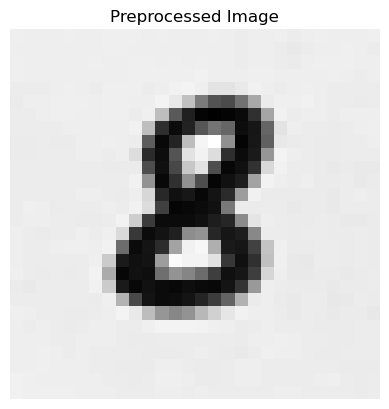

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted digit: 8


In [16]:
test_image_path = './test_image/img.png' # Provide the path to your test image
test_image = preprocess_image(test_image_path)
test_result = model.predict(test_image)
predicted_digit = np.argmax(test_result) 
print(f"Predicted digit: {predicted_digit}")